# Final Project Submission

Please fill out:
* Student name: BRITTA BETTENDORF
* Student pace: FULL TIME
* Scheduled project review date/time: Monday, Jan. 14, 2019, XX:XX
* Instructor name: RAFAEL CARRASCO
* Blog post URL: www.datenlage.blog/

# Predicting votes in relation to a basic income

### The dataset
This study on basic income across Europe was conducted by Dalia Research in April 2016 across 28 EU member states. The sample of n = 9.649 was drawn across all 28 states, taking into account current population distributions with regard to age (14-65 years), gender and region/country. The dataset is available on kaggle: https://www.kaggle.com/daliaresearch/basic-income-survey-european-dataset/home

The dataset contains **9649 records and 15 columns**, these include demographics such as age, gender, education etc. as well as opinions towards the effect of a basic income on someone's work choices, the familiarity with this idea, convincing arguments pro and con - and of course the approval for or rejection of a basic income.

Our **target** in this notebook is **to predict how people are likely to vote**. The target variable originally consisted of multiple classe, however it was converted to a binary outcome. Thus we have a typical classification task to solve. **Several different classification models such as Logistic Regression, Decision Tree, Random Forest, XGBoost and Support Vector Machine (SVM)** are built, optimized, evaluated and compared.

### The OSEMiN-approach

The OSEMiN Process is an acronym that rhymes with “awesome” and stands for **Obtain, Scrub, Explore, Model, and iNterpret**. It can be used as a blueprint for working on data problems using machine learning tools. Scrubbing (also named cleaning) and exploring the data is the whole process of preprocessing. Building the model and of course evaluating and optimizing it is the process of machine learning.

# Table of contents
<a id='Table of contents'></a>

### <a href='#1. Obtaining and viewing the data'>1. Obtaining and viewing the data</a>

### <a href='#2. Preprocessing the data'>2. Preprocessing the data</a>

* <a href='#2.1. Renaming columns'>2.1. Renaming columns</a>
* <a href='#2.2. Excluding unrelated data'>2.2. Excluding unrelated data</a>
* <a href='#2.3. Dealing with misleading data'>2.3. Dealing with misleading data</a>
* <a href='#2.4. Dealing with missing data'>2.4. Dealing with missing data</a>
* <a href='#2.5. Dealing with duplicate data'>2.5. Dealing with duplicate data</a>
* <a href='#2.6. Basic feature extraction and engineering'>2.6. Basic feature extraction and engineering</a>

### <a href='#3. Data visualization'>3. Data visualization</a>
* <a href='#3.1. Mosaic Plots'>3.1. Mosaic Plots</a>
* <a href='#3.2. Bar Charts'>3.2. Bar Charts</a>

### <a href='#4. Machine Learning'>4. Machine Learning</a>

* <a href='#4.1. Recoding categorical features'>4.1. Recoding categorical features</a>
* <a href='#4.2. Training a Logistic Regression'>4.2. Training a Logistic Regression</a>
* <a href='#4.3. Training a Decision Tree'>4.3. Training a Decision Tree</a>
* <a href='#4.4. Training a Random Forest Classifier'>4.4. Training a Random Forest Classifier</a>
* <a href='#4.5. Training an XGBoost Classifier'>4.5. Training an XGBoost Classifier</a>
* <a href='#4.6. Training a Support Vector Machine'>4.6. Training a Support Vector Machine</a>
* <a href='#4.7. Model comparison I'>4.7. Model comparison I</a>
* <a href='#4.8. Reducing dimensionality with PCA'>4.8. Reducing dimensionality with PCA</a>
* <a href='#4.9. Model comparison II - after PCA'>4.9. Model comparison II - after PCA</a>

### <a href='#5. Conclusions'>5. Conclusions</a>
* <a href='#5.1. With PCA or without?'>5.1. With PCA or without?</a>
* <a href='#5.2. Feature importance'>5.2. Feature importance</a>
* <a href='#5.3. Recommendation'>5.3. Recommendation</a>

### 1. Obtaining and viewing the data
<a id='1. Obtaining and viewing the data'></a>

Let's start by obtaining and investigating the pandas DataFrame:

In [1]:
import xgboost as xgb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from pprint import pprint

In [2]:
# reading in dataset and viewing it
df = pd.read_csv('basic_income_dataset_dalia.csv')
df.head()

,country_code,uuid,age,gender,rural,dem_education_level,dem_full_time_job,dem_has_children,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39,0.9775919155
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65,58.731.136


In [3]:
# get the number of rows and columns
print(df.shape)

# get datetype info
print()
print(df.info())

(9649, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 15 columns):
country_code                                           9649 non-null object
uuid                                                   9649 non-null object
age                                                    9649 non-null int64
gender                                                 9649 non-null object
rural                                                  9649 non-null object
dem_education_level                                    8986 non-null object
dem_full_time_job                                      9649 non-null object
dem_has_children                                       9649 non-null object
question_bbi_2016wave4_basicincome_awareness           9649 non-null object
question_bbi_2016wave4_basicincome_vote                9649 non-null object
question_bbi_2016wave4_basicincome_effect              9649 non-null object
question_bbi_2016wave4_basicincome_argumentsfo

In [4]:
# get an overview of the numeric agecolumn (.T = transposing the dataframe's order)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9649.0,37.712716,12.27063,14.0,28.0,40.0,46.0,65.0


In [5]:
# get an overview of all 14 object columns/features
df.describe(include='object').T

,count,unique,top,freq
country_code,9649,28,DE,1420
uuid,9649,9649,1eb04bf0-db7e-0133-61f5-0a81e8b09a82,1
gender,9649,2,male,5094
rural,9649,2,urban,6878
dem_education_level,8986,4,medium,3578
dem_full_time_job,9649,2,yes,5702
dem_has_children,9649,2,yes,5049
question_bbi_2016wave4_basicincome_awareness,9649,4,I know something about it,3389
question_bbi_2016wave4_basicincome_vote,9649,5,I would probably vote for it,3272
question_bbi_2016wave4_basicincome_effect,9649,9,A basic income would not affect my work choices,3349


*Back to: <a href='#Table of contents'> Table of contents</a>*
### 2. Preprocessing the data
<a id='2. Preprocessing the data'></a>

#### 2.1. Renaming columns 
<a id='2.1. Renaming columns'></a>

The column labels are quite wordy. Let's change that:

In [6]:
df.rename(columns = {'rural':'city_or_rural',
                     'dem_education_level':'education',
                     'dem_full_time_job':'full_time_job',
                     'dem_has_children':'has_children',
                     'question_bbi_2016wave4_basicincome_awareness':'awareness',
                     'question_bbi_2016wave4_basicincome_vote':'vote',
                     'question_bbi_2016wave4_basicincome_effect':'effect',
                     'question_bbi_2016wave4_basicincome_argumentsfor':'arg_for',
                     'question_bbi_2016wave4_basicincome_argumentsagainst':'arg_against'},
          inplace=True)

#### 2.2. Excluding unrelated data
<a id='2.2. Excluding unrelated data'></a>

Again, our target is to predict how people are likely to vote. Hence, features should be included only if they're suspected to be related to the target variable. Insofar as the goal of supervised classification is to predict the target, features that obviously have nothing to do with the target should be excluded.

Both variables the "uuid" and the "weight" (given to obtain census representative results) are irrelevant for our classification task here. As we want to construct our own age groups later, we will drop the predefined age groups:

In [7]:
df.drop(['uuid', 'weight', 'age_group'], axis=1, inplace=True)

In [8]:
# new number of rows and columns
df.shape

(9649, 12)

#### 2.3. Dealing with misleading data
<a id='2.3. Dealing with misleading data'></a>

All data make perfectly sense, there is nothing to correct.

#### 2.4. Dealing with missing data
<a id='2.4. Dealing with missing data'></a>

In [9]:
# checking how much missing data we have in total
df.isna().sum()

country_code       0
age                0
gender             0
city_or_rural      0
education        663
full_time_job      0
has_children       0
awareness          0
vote               0
effect             0
arg_for            0
arg_against        0
dtype: int64

We have missing data in one varibable: "eduation". How much is it in percentages?

In [10]:
# in percentage: 7%
round(df['education'].isna().sum() / len(df), 3)

0.069

As we talk about only 7& of missing values, dropping the observations with missing values is the easiest approach and reasonable:

In [11]:
df.dropna(axis=0, inplace=True)
df.isna().sum().sum()

0

In [12]:
# new number of rows and columns
df.shape

(8986, 12)

#### 2.5. Dealing with duplicate data
<a id='2.5. Dealing with duplicate data'></a>

In [13]:
# check if there are any duplicates
df.duplicated().sum()

28

Indeed, we have some duplicates, so let's drop them:

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
# final number of rows and columns
df.shape

(8958, 12)

#### 2.6. Basic feature extraction and engineering
<a id='2.6. Basic feature extraction and engineering'></a>

1. Someone who "probably votes for" the basic income, votes the same way, namely with "yes", as someone who "votes for it". The same holds for rejection. Our target first and foremost is to predict whether someone is for or against basic income, we're not so much interested in predicting someone who has no opinion and/or won't vote. So let's **simplify our target** and recode the answers and drop all records that won't take any clear action:

In [16]:
# recode voting
def vote_coding(row):
    if row == 'I would vote for it' : return('for')
    elif row == 'I would probably vote for it': return('for')
    elif row == 'I would vote against it': return('against')
    elif row == 'I would probably vote against it': return('against')
    elif row == 'I would not vote': return('no_action')

# apply function
df['vote'] = df['vote'].apply(vote_coding)

In [17]:
# drop all records who are not "for" or "against"
df = df.query("vote != 'no_action'")

In [18]:
df.vote.value_counts(normalize=True)

for        0.715629
against    0.284371
Name: vote, dtype: float64

2. Another two columns, **"awareness" and "effect"**, contain whole sentences that need to be shortened to one word to then be ultimately ready for being processed later:

In [19]:
def awareness_coding(row):
    if row == 'I understand it fully': return('fully')
    elif row == 'I know something about it': return('something')
    elif row == 'I have heard just a little about it': return('little')
    elif row == 'I have never heard of it': return('nothing')

df['awareness'] = df['awareness'].apply(awareness_coding)

In [20]:
def effect_coding(row):
    if row == '‰Û_ stop working': return('stop_working')
    elif row == '‰Û_ work less': return('work_less')
    elif row == '‰Û_ do more volunteering work': return('volunteering_work')
    elif row == '‰Û_ spend more time with my family': return('more_family_time')
    elif row == '‰Û_ look for a different job': return('different_job')
    elif row == '‰Û_ work as a freelancer': return('freelancer')
    elif row == '‰Û_ gain additional skills': return('additional_skills')
    elif row == 'A basic income would not affect my work choices': return('no_effect')
    else: return('none_of_the_above')
    
df['effect'] = df['effect'].apply(effect_coding).astype(str)

3. Next, let's build **new age groups** and then drop the numeric "age" column:

In [21]:
def age_groups(row):
    if (row >= 14) & (row < 20): return('Teens')
    elif (row >= 20) & (row < 30): return('Twenties')
    elif (row >= 30) & (row < 40): return('Thirties')
    elif (row >= 40) & (row < 50): return('Forties')
    elif (row >= 50) & (row < 60): return('Fivties')
    else: return('Sixties')
    
df['age_group'] = df['age'].apply(age_groups)
df.drop(['age'], axis=1, inplace=True)

4. Lastly, let's extract the **two most mentioned arguments for and against a basic income** and build new columns with boolean values:

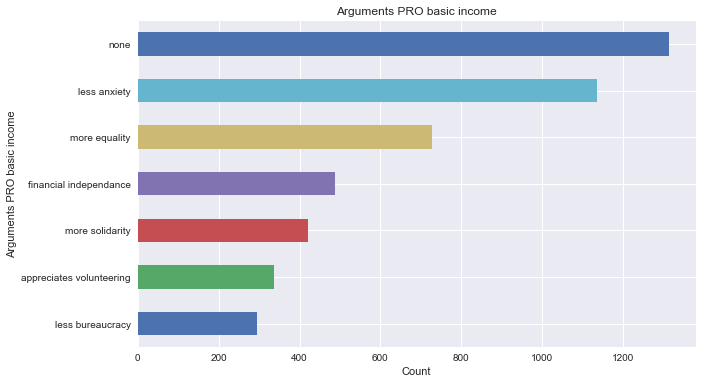

In [22]:
arg_for = ['It reduces anxiety about financing basic needs',
           'It creates more equality of opportunity',
           'It encourages financial independence and self-responsibility',
           'It increases solidarity, because it is funded by everyone',
           'It reduces bureaucracy and administrative expenses',
           'It increases appreciation for household work and volunteering',
           'None of the above']

# count all arguments
counter = [0,0,0,0,0,0,0]

for row in df.iterrows():
    for i in range(0, len(arg_for)):
        if arg_for[i] in row[1]['arg_for'].split('|'):
            counter[i] = counter[i] + 1

# create a new dictionary 
dict_keys = ['less anxiety', 'more equality', 'financial independance', 
             'more solidarity', 'less bureaucracy', 'appreciates volunteering', 'none']

arg_dict = {}

for i in range(0, len(arg_for)):
    arg_dict[dict_keys[i]] = counter[i]

# sub-df for counted arguments
sub_df = pd.DataFrame(list(arg_dict.items()), columns=['Arguments PRO basic income', 'count'])

# plotting
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='Arguments PRO basic income', y='count',  
                                                      figsize=(10,6), legend=False,
                                                      title='Arguments PRO basic income')
plt.xlabel('Count'); 

In [23]:
df['anxiety'] = df['arg_for'].str.contains('anxiety')
df['equality'] = df['arg_for'].str.contains('equality')

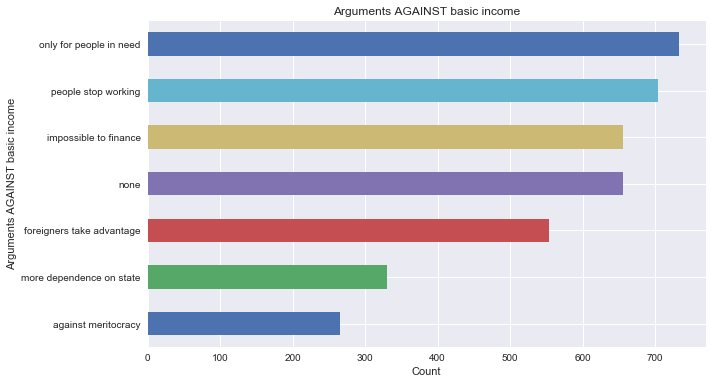

In [24]:
arg_against = ['It is impossible to finance', 'It might encourage people to stop working',
               'Foreigners might come to my country and take advantage of the benefit',
               'It is against the principle of linking merit and reward', 
               'Only the people who need it most should get something from the state',
               'It increases dependence on the state', 'None of the above']

# count all arguments
counter = [0,0,0,0,0,0,0]

for row in df.iterrows():
    for i in range(0, len(arg_against)):
        if arg_against[i] in row[1]['arg_against'].split('|'):
            counter[i] = counter[i] + 1

# create a new dictionary 
dict_keys = ['impossible to finance', 'people stop working', 'foreigners take advantage', 
             'against meritocracy', 'only for people in need', 'more dependence on state', 'none']

arg_dict = {}

for i in range(0, len(arg_against)):
    arg_dict[dict_keys[i]] = counter[i]

# sub-df for counted arguments
sub_df = pd.DataFrame(list(arg_dict.items()), columns=['Arguments AGAINST basic income', 'count'])

# plotting
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='Arguments AGAINST basic income', y='count',  
                                                      figsize=(10,6), legend=False,
                                                      title='Arguments AGAINST basic income')
plt.xlabel('Count'); 

In [25]:
df['neediness'] = df['arg_against'].str.contains('need')
df['laziness'] = df['arg_against'].str.contains('stop working')

In [26]:
df.drop(['arg_for', 'arg_against'], axis=1, inplace=True)

In [27]:
df.head()

,country_code,gender,city_or_rural,education,full_time_job,has_children,awareness,vote,effect,age_group,anxiety,equality,neediness,laziness
1,AT,male,urban,high,yes,yes,fully,for,no_effect,Fivties,True,False,False,True
3,AT,male,rural,high,yes,yes,little,for,work_less,Forties,True,False,False,False
4,AT,female,urban,high,yes,yes,little,for,none_of_the_above,Forties,True,False,False,True
5,AT,female,rural,high,yes,no,fully,against,no_effect,Twenties,True,False,False,True
6,AT,female,urban,medium,no,no,something,for,freelancer,Twenties,True,False,False,True


In [28]:
df.shape

(7979, 14)

*Back to: <a href='#Table of contents'> Table of contents</a>*
### 3. Data visualization
<a id='3. Data visualization'></a>

Between preprocessing and model buildung lies the important step of data visualization. It serves as a sanity check of the features and target and may help explore the relationship between both, which will guide us in model building and assist us in our understanding of the model and predictions. The target is what we are asked to predict: either a "yes" to basic income or a "no" or indifference. 

**We should first examine the number of votes falling into each category.**

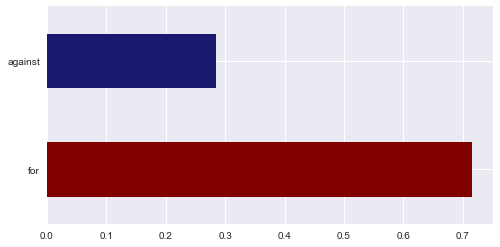

In [29]:
df['vote'].value_counts(normalize=True).plot(kind='barh', figsize=(8,4), 
                                             color=['maroon','midnightblue']);

By looking at the number of records we have for each class, we see that we have roughly 70% voting for a basic income vs. 30% against.

#### 3.1. Mosaic Plots
<a id='3.1. Mosaic Plots'></a>

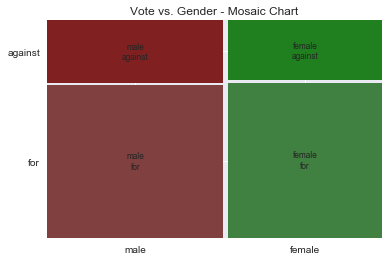

In [30]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['gender', 'vote'], gap=0.015, title='Vote vs. Gender - Mosaic Chart');

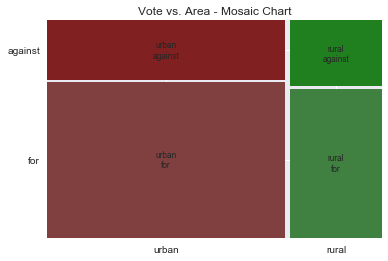

In [31]:
mosaic(df, ['city_or_rural', 'vote'], gap=0.015, title='Vote vs. Area - Mosaic Chart');

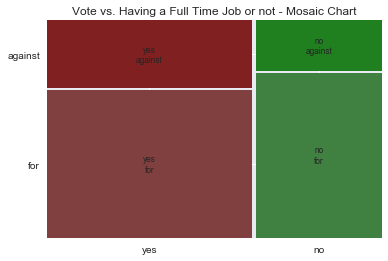

In [32]:
mosaic(df, ['full_time_job', 'vote'], gap=0.015, 
       title='Vote vs. Having a Full Time Job or not - Mosaic Chart');

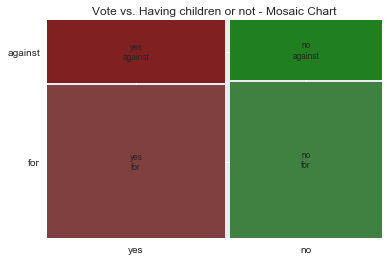

In [33]:
mosaic(df, ['has_children', 'vote'], gap=0.015, 
       title='Vote vs. Having children or not - Mosaic Chart');

#### 3.2. Bar Charts
<a id='3.2. Bar Charts'></a>

##### Vote and Full Time Job

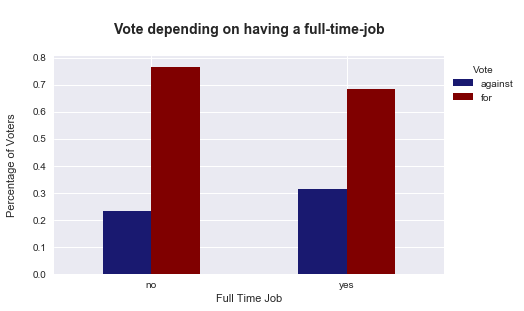

In [34]:
# Votes depending on having a full-time-job

sub_df = df.groupby('full_time_job')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(7,4))
plt.xlabel("Full Time Job")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on having a full-time-job\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

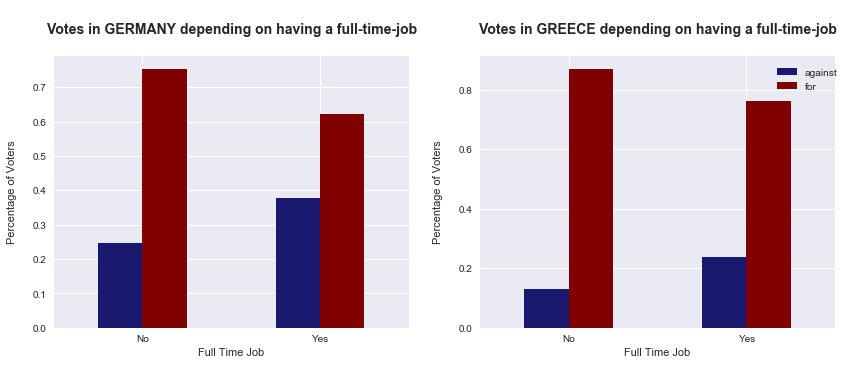

In [35]:
# Votes in GERMANY and GREECE - depending on having a full-time-job

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# creating sub-df for Germany
sub_df_1 = df[df['country_code']=='DE'].groupby('full_time_job')['vote'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax1, legend=False)
ax1.set_title('\nVotes in GERMANY depending on having a full-time-job\n', fontsize=14, fontweight='bold')
ax1.set_xlabel("Full Time Job")
ax1.set_xticklabels(labels=['No', 'Yes'], rotation=0)
ax1.set_ylabel("Percentage of Voters\n")

# creating sub-df for Greece
sub_df_2 = df[df['country_code']=='GR'].groupby('full_time_job')['vote'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax2, legend=False)
ax2.set_title('\nVotes in GREECE depending on having a full-time-job\n', fontsize=14, fontweight='bold')
ax2.set_xlabel("Full Time Job")
ax2.set_xticklabels(labels=['No', 'Yes'], rotation=0)
ax2.set_ylabel("Percentage of Voters\n")

# create one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.84, 0.85))
plt.show();

##### Vote and Education Level

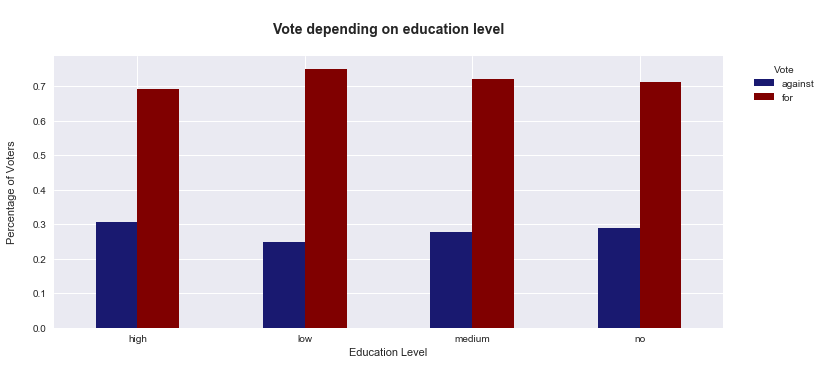

In [36]:
# Plotting vote depending on education level

sub_df = df.groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color = ['midnightblue','maroon'], figsize=(12,5))
plt.xlabel("Education Level")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on education level\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.15, 1), title='Vote');

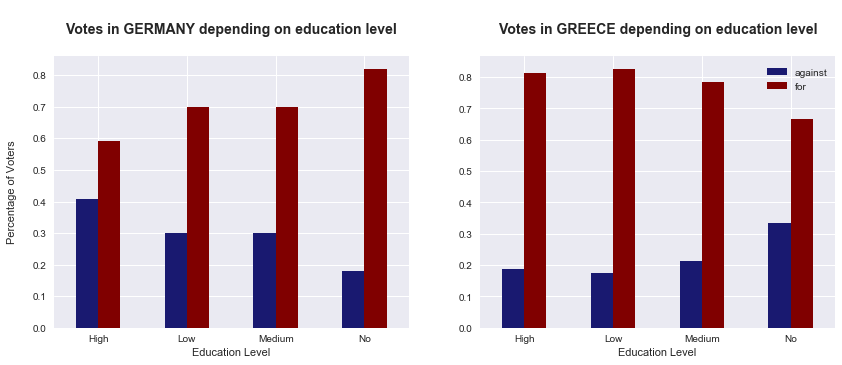

In [37]:
# Plotting votes in GERMANY and GREECE - depending on education level

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# creating sub-df for Germany
sub_df_1 = df[df['country_code']=='DE'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax1, legend=False)
ax1.set_title('\nVotes in GERMANY depending on education level\n', fontsize=14, fontweight='bold')
ax1.set_xlabel("Education Level")
ax1.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)
ax1.set_ylabel("Percentage of Voters\n")

# creating df for Greece
sub_df_2 = df[df['country_code']=='GR'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax2, legend=False)
ax2.set_title('\nVotes in GREECE depending on education level\n', fontsize=14, fontweight='bold')
ax2.set_xlabel("Education Level")
ax2.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)

# create one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.83, 0.85))
plt.show();

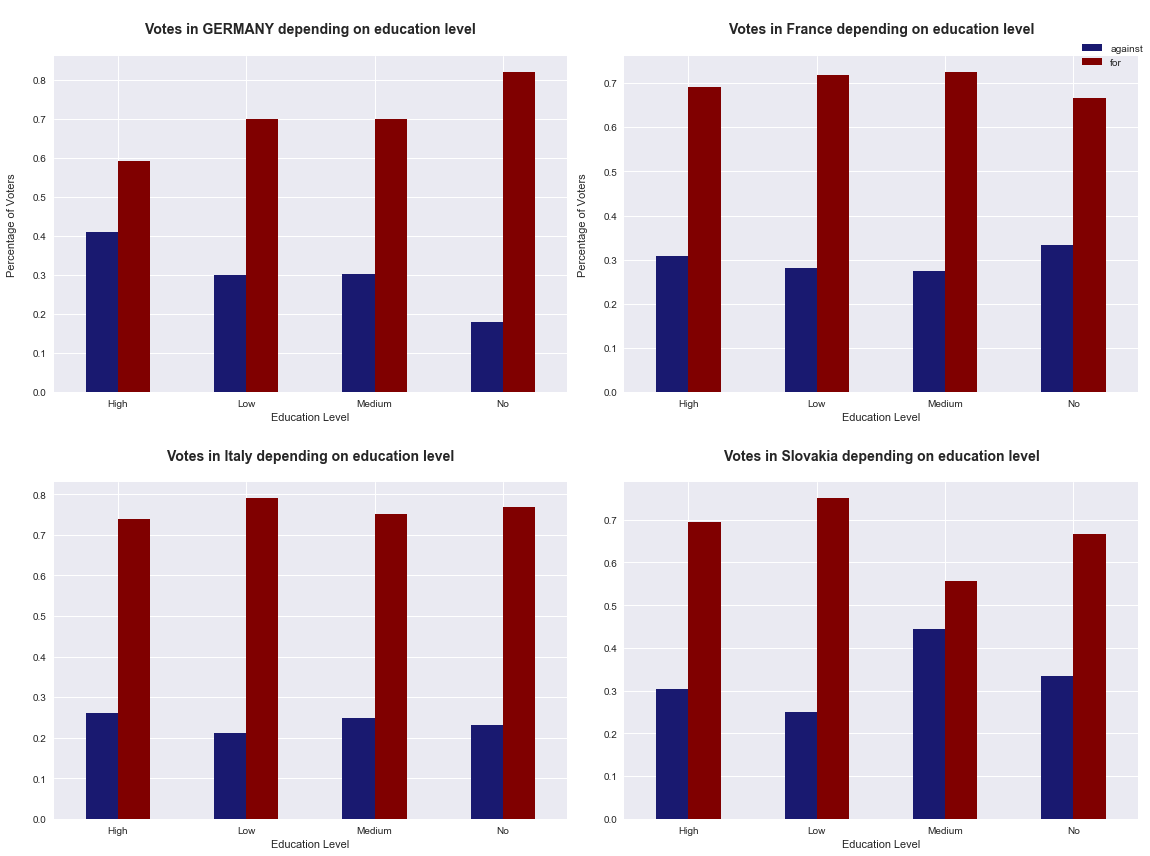

In [38]:
# Plotting votes in 4 countries - depending on education level

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))

# creating sub-df for Germany
sub_df_1 = df[df['country_code']=='DE'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax1, legend=False)
ax1.set_title('\nVotes in GERMANY depending on education level\n', fontsize=14, fontweight='bold')
ax1.set_xlabel("Education Level")
ax1.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)
ax1.set_ylabel("Percentage of Voters\n")

# creating sub-df for France
sub_df_2 = df[df['country_code']=='FR'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax2, legend=False)
ax2.set_title('\nVotes in France depending on education level\n', fontsize=14, fontweight='bold')
ax2.set_xlabel("Education Level")
ax2.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)
ax2.set_ylabel("Percentage of Voters\n")

# creating sub-df for Italy
sub_df_3 = df[df['country_code']=='IT'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_3.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax3, legend=False)
ax3.set_title('\nVotes in Italy depending on education level\n', fontsize=14, fontweight='bold')
ax3.set_xlabel("Education Level")
ax3.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)

# creating sub-df for Slovakia
sub_df_4 = df[df['country_code']=='SK'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_4.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax4, legend=False)
ax4.set_title('\nVotes in Slovakia depending on education level\n', fontsize=14, fontweight='bold')
ax4.set_xlabel("Education Level")
ax4.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)

# create only one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.0, 0.95))
plt.tight_layout()
plt.show();

##### Vote and Awareness

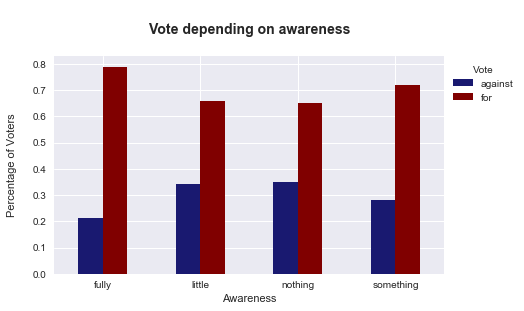

In [39]:
# Votes depending on awareness

sub_df = df.groupby('awareness')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(7,4))
plt.xlabel("Awareness")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on awareness\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

##### Vote and age group

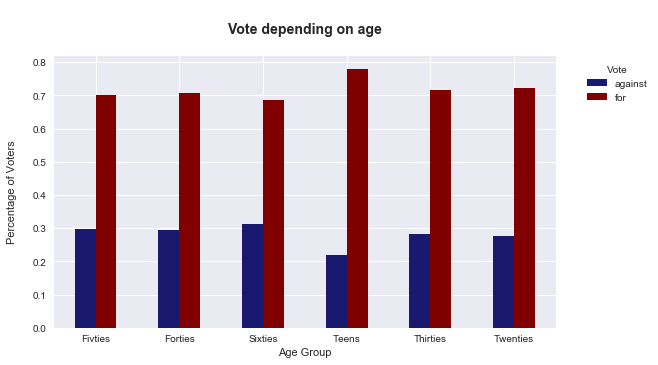

In [40]:
# Votes depending on age

sub_df = df.groupby('age_group')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(9,5))
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on age\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

##### Vote and expected effect

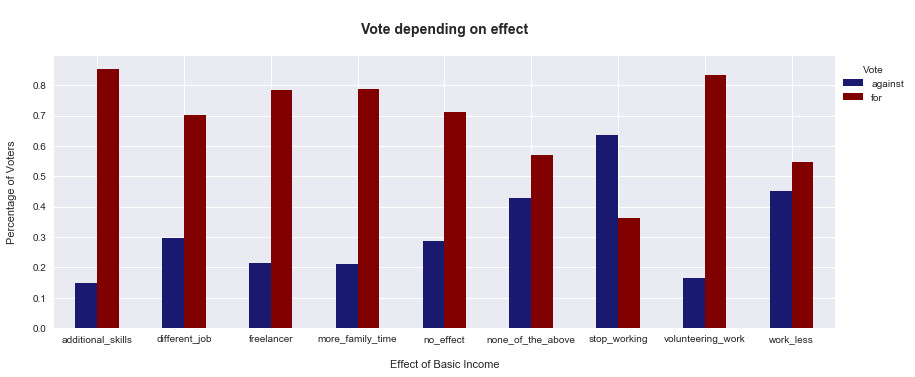

In [93]:
# Votes depending on effect

sub_df = df.groupby('effect')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(14,5))
plt.xlabel("\nEffect of Basic Income")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on effect\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.1, 1.0), title='Vote');

##### Vote and arguments

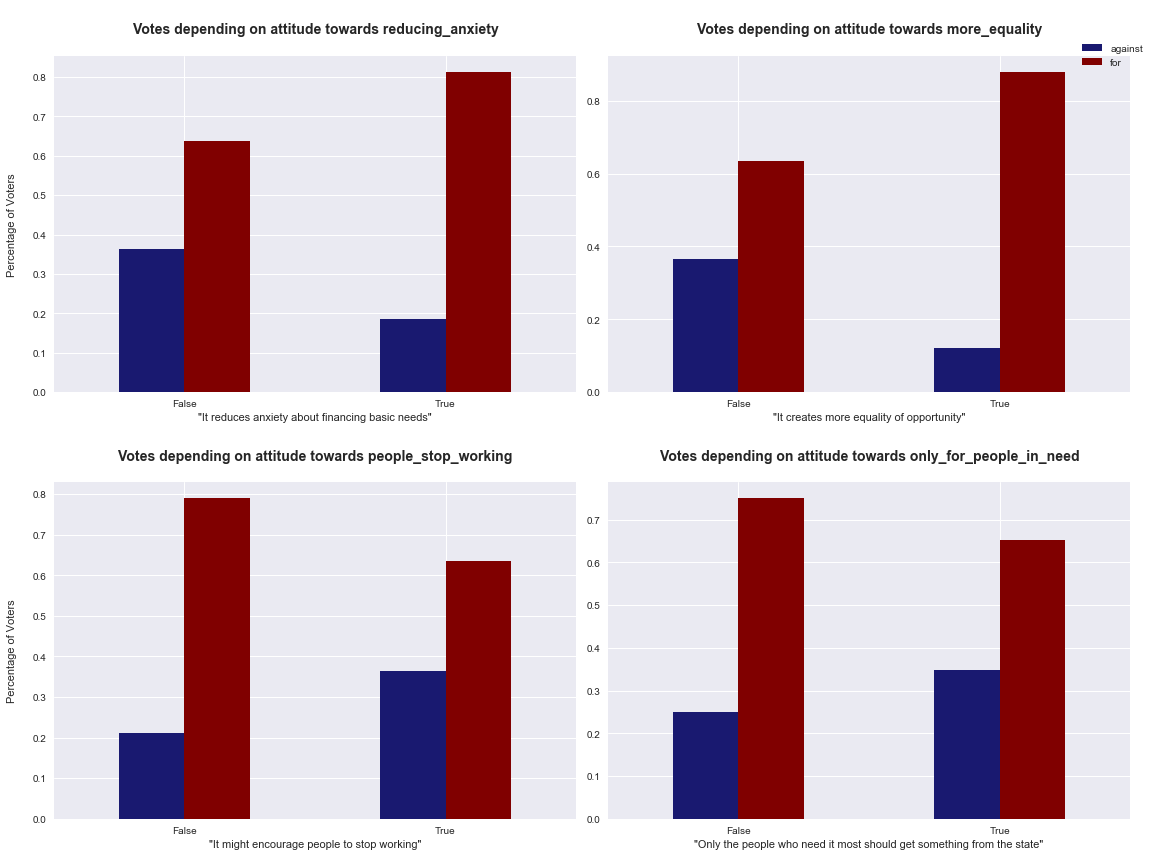

In [46]:
# Plotting votes in 4 countries - depending on education level

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))

# creating sub-df for those who agree/disagree to the argument:
# "It reduces anxiety about financing basic needs"
sub_df_1 = df.groupby('anxiety')['vote'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax1, legend=False)
ax1.set_title('\nVotes depending on attitude towards reducing_anxiety\n', fontsize=14, fontweight='bold')
ax1.set_xlabel('"It reduces anxiety about financing basic needs"')
ax1.set_xticklabels(labels=['False', 'True'], rotation=0)
ax1.set_ylabel("Percentage of Voters\n")

# creating sub-df for those who agree/disagree to the argument:
# "It creates more equality of opportunity"
sub_df_2 = df.groupby('equality')['vote'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax2, legend=False)
ax2.set_title('\nVotes depending on attitude towards more_equality\n', fontsize=14, fontweight='bold')
ax2.set_xlabel('"It creates more equality of opportunity"')
ax2.set_xticklabels(labels=['False', 'True'], rotation=0)

# creating sub-df for those who agree/disagree to the argument:
# "It might encourage people to stop working"
sub_df_3 = df.groupby('laziness')['vote'].value_counts(normalize=True).unstack()
sub_df_3.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax3, legend=False)
ax3.set_title('\nVotes depending on attitude towards people_stop_working\n', fontsize=14, fontweight='bold')
ax3.set_xlabel('"It might encourage people to stop working"')
ax3.set_xticklabels(labels=['False', 'True'], rotation=0)
ax3.set_ylabel("Percentage of Voters\n")

# creating sub-df for those who agree/disagree to the argument:
# "Only the people who need it most should get something from the state"
sub_df_4 = df.groupby('neediness')['vote'].value_counts(normalize=True).unstack()
sub_df_4.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax4, legend=False)
ax4.set_title('\nVotes depending on attitude towards only_for_people_in_need\n', fontsize=14, fontweight='bold')
ax4.set_xlabel('"Only the people who need it most should get something from the state"')
ax4.set_xticklabels(labels=['False', 'True'], rotation=0)

# create only one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.0, 0.95))
plt.tight_layout()
plt.show();

*Back to: <a href='#Table of contents'> Table of contents</a>*
### 4. Machine Learning
<a id='4. Machine Learning'></a>

#### 4.1. Recoding categorical features
<a id='4.1. Recoding categorical features'></a>

Machine learning algorithms generally need all data - including categorical data - in numeric form. To satisfy them, categorical features are converted into separate binary features called dummy variables.
Therefore, we have to find a way to represent these variables as numbers before handing them off to the model. 
There are two main ways to carry out this process:
- Label encoding: Assigns each unique category in a categorical variable with an integer. No new columns are created.
- One-hot encoding: Creates a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns. 

There is some debate about the relative merits of these approaches. I think for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values and orders to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by a dimensionality reduction methods like PCA to reduce the number of dimensions (while still trying to preserve information). **For one-hot encoding, we use the pandas get_dummies(df) function.**

In [94]:
# Define our features 
features = df.drop(["vote"], axis=1)

# Define our target
target = df[["vote"]]

# create dummy variables
features = pd.get_dummies(features)

In [95]:
print(features.shape)
features.tail(2)

(7979, 63)


,anxiety,equality,neediness,laziness,country_code_AT,country_code_BE,country_code_BG,country_code_CY,country_code_CZ,country_code_DE,...,effect_none_of_the_above,effect_stop_working,effect_volunteering_work,effect_work_less,age_group_Fivties,age_group_Forties,age_group_Sixties,age_group_Teens,age_group_Thirties,age_group_Twenties
9647,True,True,False,False,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9648,False,False,False,True,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [96]:
print(target.shape)
target.tail(2)

(7979, 1)


,vote
9647,for
9648,against


In [97]:
print(df.shape)
df.tail(2)

(7979, 14)


,country_code,gender,city_or_rural,education,full_time_job,has_children,awareness,vote,effect,age_group,anxiety,equality,neediness,laziness
9647,SK,male,urban,low,yes,yes,fully,for,no_effect,Forties,True,True,False,False
9648,SK,female,urban,high,yes,yes,fully,against,no_effect,Fivties,False,False,False,True


*Back to: <a href='#Table of contents'> Table of contents</a>*
#### 4.2. Training a Logistic Regression
<a id='4.2. Training a Logistic Regression'></a>

When approaching a supervised learning problem like ours, we should always use multiple algorithms and compare the performances of the various models. Sometimes simplest is best, and so we will start by applying logistic regression. Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. Once we have more models, we can compare them on a few performance metrics.

Before we start, let's prepare our work and import all libraries we need for classifying our data:

In [98]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [99]:
# Split our data based on the PCA reduced feature set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [100]:
# Instantiate the logistic regression
logreg = LogisticRegression()

# Train
logreg.fit(X_train, y_train)

# Predict
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

# Evaluate
train_accuracy_logreg = accuracy_score(y_train, train_preds)
test_accuracy_logreg = accuracy_score(y_test, test_preds)
report_logreg = classification_report(y_test, test_preds)

print("Logistic Regression")
print("------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg * 100):.4}%")

# store accuracy in a new dataframe
score_logreg = ['Logistic Regression', train_accuracy_logreg, test_accuracy_logreg]
models = pd.DataFrame([score_logreg])

Logistic Regression
------------------------
Training Accuracy: 77.38%
Test Accuracy:     77.94%


#### 4.3. Training a Decision Tree
<a id='4.3. Training a Decision Tree'></a>

Next, we will be using a simple algorithm known as a decision tree. In addition to being easy to both use and interpret, decision trees allow us to visualize the *flowchart* that the model generates from the training data.

In [101]:
# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [102]:
# Instantiate the plain classifier
dt = DecisionTreeClassifier()

# Train
dt.fit(X_train, y_train)

# Predict
train_preds = dt.predict(X_train)
test_preds = dt.predict(X_test)

# Evaluate
train_accuracy_dt = accuracy_score(y_train, train_preds)
test_accuracy_dt = accuracy_score(y_test, test_preds)
report_dt = classification_report(y_test, test_preds)

print("Plain Decision Tree")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_dt * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_dt * 100):.4}%")

# append accuracy score to our dataframe
score_dt = ['Plain Decision Tree', train_accuracy_dt, test_accuracy_dt]
models = models.append([score_dt])

Plain Decision Tree
-------------------------
Training Accuracy: 99.31%
Test Accuracy:     67.54%


The model performs extremely accurate on the training set and fails to do the same on the test data - clearly: overfitting!

To balance our model, we can apply what's called cross-validation (CV). CV attempts to split the data multiple ways and test the model on each of the splits, iteratively using each subset as a test set while using the remainder of the data as train sets. Finally, we can then aggregate the results from each fold for a final model performance score. Moreover, let's try to tune the decision hyperparameters to gain a better performance. In a grid search we will try several different combinations of those.
1. We print our the default parameters currently in use.
2. We apply a grid search to look for the best parameters for our decision - evaluated from a range we predefined.
3. We use those and run a new *tuned* decision tree with the found hyperparameters.

In [56]:
from pprint import pprint
print('Decision Tree Parameters currently in use:\n')
pprint(dt.get_params())

Decision Tree Parameters currently in use:

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


In [57]:
# import Grid Search
from sklearn.model_selection import GridSearchCV

# Create Grid              
param_grid = {'criterion': ['gini', 'entropy'],
              'max_features': [5, 10, 15],         
              'max_depth': [3, 5, 7],
              'min_samples_split': [4, 5, 6]}

# Instantiate the tuned random forest
dt_grid_search = GridSearchCV(dt, param_grid, cv=3)

# Train the tuned random forest
dt_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(dt_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 15, 'min_samples_split': 4}


In [103]:
# Instantiate the tuned decision tree classifier
dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=7, 
                                  max_features=15, min_samples_split=4)

# Train
dt_tuned.fit(X_train, y_train)

# Predict
train_preds = dt_tuned.predict(X_train)
test_preds = dt_tuned.predict(X_test)

# Evaluate
train_accuracy_dt_tuned = accuracy_score(y_train, train_preds)
test_accuracy_dt_tuned = accuracy_score(y_test, test_preds)
report_dt_tuned = classification_report(y_test, test_preds)

print("Tuned Decision Tree")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_dt_tuned * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_dt_tuned * 100):.4}%")

# append accuracy score to our dataframe
score_dt_tuned = ['Tuned Decision Tree', train_accuracy_dt_tuned, test_accuracy_dt_tuned]
models = models.append([score_dt_tuned])

Tuned Decision Tree
-------------------------
Training Accuracy: 76.53%
Test Accuracy:     76.0%


Although our tree's performance is decent, it's a bad idea to immediately assume that it's therefore the perfect tool for this job -- there's always the possibility of other models that will perform even better! It's always a worthwhile idea to at least test a few other algorithms and find the one that's best for our data.

#### 4.4. Training a Random Forest Classifier
<a id='4.4. Training a Random Forest Classifier'></a>

Next, let's run a simple, plain random forest without any specifications to get a sense of how the data would "behave" without any tuned hyperparameters.

In [104]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [105]:
# Instantiate the plain classifier
forest = RandomForestClassifier()

# Train
forest.fit(X_train, y_train)

# Predict
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

# Evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)
report_forest = classification_report(y_test, test_preds)

print("Plain Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

# append accuracy score to our dataframe
score_forest = ['Plain Random Forest', train_accuracy_forest, test_accuracy_forest]
models = models.append([score_forest])

Plain Random Forest
-------------------------
Training Accuracy: 98.29%
Test Accuracy:     75.0%


Again, we have to cope with overfitting! And we will, again, apply a grid search to tune our classifier.

In [62]:
from pprint import pprint
print('Random Forest Parameters currently in use:\n')
pprint(forest.get_params())

Random Forest Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Some of the important hyperparameters to tune for a Random Forest are:

* n_estimators = number of trees
* criterion = splitting criterion (for maximizing the information gain from each split)
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min samples needed to make a split

In [106]:
# Create Grid              
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_features': [5, 7, 9],         
              'max_depth': [5, 8, 10], 
              'min_samples_split': [2, 3, 4]}

# Instantiate the tuned random forest
forest_grid_search = GridSearchCV(forest, param_grid, cv=3)

# Train the tuned random forest
forest_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(forest_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'min_samples_split': 3, 'n_estimators': 100}


In [107]:
# Instantiate the tuned random forest with the best found parameters
forest_tuned = RandomForestClassifier(n_estimators=100, criterion='gini', max_features=9, 
                                      max_depth=10, min_samples_split=3)

# Train the random forest
forest_tuned.fit(X_train, y_train)

# Predict
train_preds = forest_tuned.predict(X_train)
test_preds = forest_tuned.predict(X_test)

# Evaluate
train_accuracy_forest_tuned = accuracy_score(y_train, train_preds)
test_accuracy_forest_tuned = accuracy_score(y_test, test_preds)
report_forest_tuned = classification_report(y_test, test_preds)

print("Tuned Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest_tuned * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest_tuned * 100):.4}%")

# append accuracy score to our dataframe
score_forest_tuned = ['Tuned Random Forest', train_accuracy_forest_tuned, test_accuracy_forest_tuned]
models = models.append([score_forest_tuned])

Tuned Random Forest
-------------------------
Training Accuracy: 80.76%
Test Accuracy:     77.32%


Much better with respect to our previous problem of overfitting!

#### 4.5. Training an XGBoost Classifier
<a id='4.5. Training an XGBoost Classifier'></a>

Gradient Boosting is one of the most powerful concepts in machine learning right now. The term Gradient Boosting refers to a class of algorithms rather than any single one. The version with the highest performance right now is XGBoost, which is short for eXtreme Gradient Boosting.

XGBoost is a great choice for classification tasks. It provides best-in-class performance compared to other classification algorithms (with the exception of Deep Learning).

In [108]:
# Instantiate xgboost
booster = xgb.XGBClassifier()

# Train
booster.fit(X_train, y_train)

# Predict
train_preds = booster.predict(X_train)
test_preds = booster.predict(X_test)

# Evaluate
train_accuracy_booster = accuracy_score(y_train, train_preds)
test_accuracy_booster = accuracy_score(y_test, test_preds)
report_booster = classification_report(y_test, test_preds)

print("Plain XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")

# append accuracy score to our dataframe
score_booster = ['Plain XGBoost', train_accuracy_booster, test_accuracy_booster]
models = models.append([score_booster])

Plain XGBoost
-------------------------
Training Accuracy: 78.62%
Test Accuracy:     77.51%


In [65]:
from pprint import pprint
print('XGBoost Parameters currently in use:\n')
pprint(booster.get_params())

XGBoost Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}


Some of the important hyperparameters to tune for an XGBoost are:

* n_estimators = number of trees
* learning_rate = rate at which our model learns patterns in data (After every round, it shrinks the feature weights to reach the best optimum:)
* max_depth = max number of levels in each decision tree
* colsample_bytree = similar to max_features (max number of features considered for splitting a node)
* gamma = specifies the minimum loss reduction required to make a split

In [109]:
# Create Grid
param_grid = {'n_estimators': [100],
              'learning_rate': [0.05, 0.1], 
              'max_depth': [3, 5, 10],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# Instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, scoring='accuracy', cv=3)

# Train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [110]:
# Instantiate tuned xgboost
booster_tuned = xgb.XGBClassifier(learning_rate=0.05, max_depth=5, n_estimators=100,
                                  colsample_bytree=0.7, gamma=0.0)

# Train
booster_tuned.fit(X_train, y_train)

# Predict
train_preds = booster_tuned.predict(X_train)
test_preds = booster_tuned.predict(X_test)

# Evaluate
train_accuracy_booster_tuned = accuracy_score(y_train, train_preds)
test_accuracy_booster_tuned = accuracy_score(y_test, test_preds)
report_booster_tuned = classification_report(y_test, test_preds)

print("Tuned XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster_tuned * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster_tuned * 100):.4}%")

# append accuracy score to our dataframe
score_booster_tuned = ['Tuned XGBoost', train_accuracy_booster_tuned, test_accuracy_booster_tuned]
models = models.append([score_booster_tuned])

Tuned XGBoost
-------------------------
Training Accuracy: 79.66%
Test Accuracy:     78.07%


#### 4.6 Training a Support Vector Machine
<a id='4.6. Training a Support Vector Machine'></a>

Another fast and popular classification technique is: Support Vector Machines (also referred to as SVMs). The idea behind SVMs is that we perform classification by finding the seperation line or "hyperplane" that best differates between two classes.

In [111]:
from sklearn import svm

In [112]:
# instantiate Support Vector Classification
svm = svm.SVC(kernel='rbf')

# Train
svm.fit(X_train, y_train)

# Predict
train_preds = svm.predict(X_train)
test_preds = svm.predict(X_test)

# Evaluate
train_accuracy_svm = accuracy_score(y_train, train_preds)
test_accuracy_svm = accuracy_score(y_test, test_preds)
report_svm = classification_report(y_test, test_preds)

print("Support Vector Machine")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_svm * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_svm * 100):.4}%")

# append accuracy score to our dataframe
score_svm = ['Support Vector Machine', train_accuracy_svm, test_accuracy_svm]
models = models.append([score_svm])

Support Vector Machine
-------------------------
Training Accuracy: 76.75%
Test Accuracy:     77.82%


*Back to: <a href='#Table of contents'> Table of contents</a>*
#### 4.7. Model comparison I
<a id='4.7. Model comparison I'></a>

Now that we run several models, let's check (and beautify) the dataframe we built on the go:

In [113]:
models

,0,1,2
0,Logistic Regression,0.773774,0.779449
0,Plain Decision Tree,0.993107,0.675439
0,Tuned Decision Tree,0.765314,0.760025
0,Plain Random Forest,0.982923,0.750000
0,Tuned Random Forest,0.807614,0.773183
0,Plain XGBoost,0.786151,0.775063
0,Tuned XGBoost,0.796647,0.780702
0,Support Vector Machine,0.767507,0.778195


In [114]:
models.columns = ['Classifier', 'Training Accuracy', "Testing Accuracy"]
models.set_index(['Classifier'], inplace=True)
# sort by testing accuracy
models.sort_values(['Testing Accuracy'], ascending=[False])

,Training Accuracy,Testing Accuracy
Classifier,,
Tuned XGBoost,0.796647,0.780702
Logistic Regression,0.773774,0.779449
Support Vector Machine,0.767507,0.778195
Plain XGBoost,0.786151,0.775063
Tuned Random Forest,0.807614,0.773183
Tuned Decision Tree,0.765314,0.760025
Plain Random Forest,0.982923,0.750000
Plain Decision Tree,0.993107,0.675439


*Back to: <a href='#Table of contents'> Table of contents</a>*
#### 4.8. Reducing dimensionality with PCA
<a id='4.8. Reducing dimensionality with PCA'></a>

Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use scree-plots and cumulative explained ratio plots to find the number of components to use in further analyses.

**Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance.** Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.

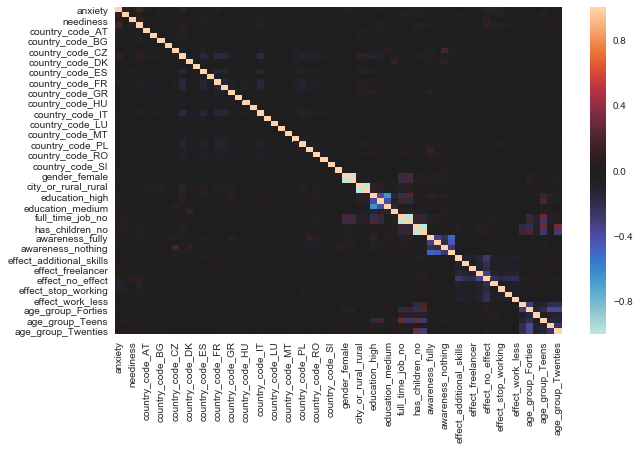

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(features.corr(), center=0);

In [116]:
# Importing PCA
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(features)
exp_variance = pca.explained_variance_ratio_

print(pca.explained_variance_ratio_)
print(pca.n_components_)

[1.00382378e-01 8.23016092e-02 6.73710163e-02 5.69356883e-02
 5.40452226e-02 4.93153268e-02 4.80560258e-02 4.05247482e-02
 3.90395402e-02 3.80150206e-02 3.23835128e-02 3.16599077e-02
 3.11725454e-02 2.93409036e-02 2.82596840e-02 2.14959763e-02
 2.06538212e-02 1.95623237e-02 1.89834900e-02 1.79709759e-02
 1.76761785e-02 1.64788094e-02 1.40250374e-02 1.30952000e-02
 1.02734765e-02 1.01258860e-02 9.72074029e-03 9.45990590e-03
 8.14508935e-03 7.40207854e-03 6.23745756e-03 5.81227458e-03
 5.56317804e-03 5.07403988e-03 4.26101539e-03 3.30371632e-03
 3.16118383e-03 2.85571591e-03 2.63446389e-03 2.53224684e-03
 2.32090067e-03 2.09628864e-03 1.93599595e-03 1.64732494e-03
 1.50961954e-03 1.43130162e-03 1.32691262e-03 7.76186392e-04
 5.26200348e-04 4.05171685e-04 2.36433708e-04 2.09926308e-04
 1.39330354e-04 1.30996957e-04 6.93451602e-32 5.47894404e-33
 4.63492361e-33 4.50653085e-33 1.99548281e-33 1.95001285e-33
 1.81151097e-33 1.46728106e-33 1.40368574e-33]
63


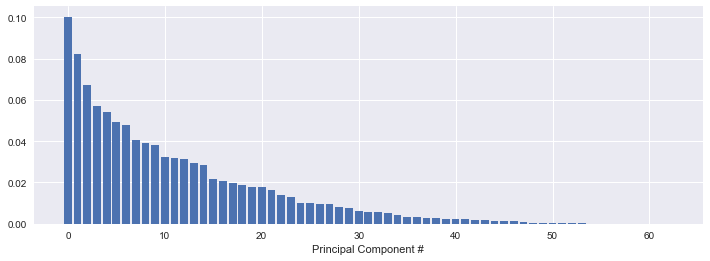

In [117]:
# plot the explained variance using a barplot
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(range(63), exp_variance)
ax.set_xlabel('Principal Component #');

Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. Instead, we can also look at the cumulative explained variance plot to determine how many features are required to explain, say, about 90% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.

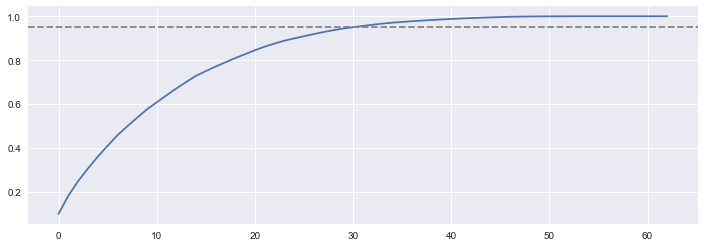

In [118]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(63), cum_exp_variance)
ax.axhline(y=0.95, linestyle='--', color='grey');

In [119]:
# choose the number of components with a cumulative explained variance of 90%
n_components = 30

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components)
pca.fit(features)
pca_projection = pca.transform(features)

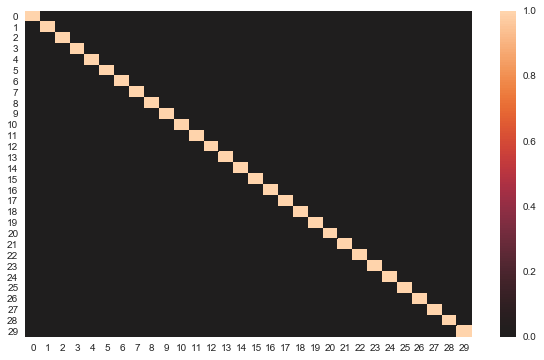

In [120]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(pca_projection).corr(), center=0);

##### Training different classifiers

In [121]:
# Split our data based on the PCA reduced feature set
X_train, X_test, y_train, y_test = train_test_split(pca_projection, target, test_size=0.25)

**a) Logistic Regression:**

In [122]:
# Instantiate the logistic regression
logreg_2 = LogisticRegression()

# Train
logreg_2.fit(X_train, y_train)

# Predict
train_preds = logreg_2.predict(X_train)
test_preds = logreg_2.predict(X_test)

# Evaluate
train_accuracy_logreg_2 = accuracy_score(y_train, train_preds)
test_accuracy_logreg_2 = accuracy_score(y_test, test_preds)
report_logreg_2 = classification_report(y_test, test_preds)

print("Logistic Regression")
print("------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg_2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg_2 * 100):.4}%")

# store accuracy in a new dataframe
score_logreg_2 = ['Logistic Regression', train_accuracy_logreg_2, test_accuracy_logreg_2]
models_2 = pd.DataFrame([score_logreg_2])

Logistic Regression
------------------------
Training Accuracy: 77.11%
Test Accuracy:     76.49%


**b) Decision Tree:**

In [123]:
# Instantiate plain decision tree
dt_2 = DecisionTreeClassifier()

# Train
dt_2.fit(X_train, y_train)

# Predict
train_preds = dt_2.predict(X_train)
test_preds = dt_2.predict(X_test)

# Evaluate
train_accuracy_dt_2 = accuracy_score(y_train, train_preds)
test_accuracy_dt_2 = accuracy_score(y_test, test_preds)
report_dt_2 = classification_report(y_test, test_preds)

print("Plain Decision Tree")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_dt_2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_dt_2 * 100):.4}%")

# append accuracy score to our dataframe
score_dt_2 = ['Plain Decision Tree', train_accuracy_dt_2, test_accuracy_dt_2]
models_2 = models_2.append([score_dt_2])

Plain Decision Tree
-------------------------
Training Accuracy: 99.35%
Test Accuracy:     66.22%


In [80]:
# import Grid Search
from sklearn.model_selection import GridSearchCV

# Create Grid              
param_grid = {'criterion': ['gini', 'entropy'],
              'max_features': [5, 10, 15],         
              'max_depth': [3, 5, 7],
              'min_samples_split': [4, 5, 6]}

# Instantiate the tuned random forest
dt_2_grid_search = GridSearchCV(dt_2, param_grid, cv=3)

# Train the tuned random forest
dt_2_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(dt_2_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 15, 'min_samples_split': 6}


In [124]:
# Instantiate the tuned decision tree classifier
dt_2_tuned = DecisionTreeClassifier(criterion='gini', max_depth=3, 
                                    max_features=15, min_samples_split=6)

# Train
dt_2_tuned.fit(X_train, y_train)

# Predict
train_preds = dt_2_tuned.predict(X_train)
test_preds = dt_2_tuned.predict(X_test)

# Evaluate
train_accuracy_dt_2_tuned = accuracy_score(y_train, train_preds)
test_accuracy_dt_2_tuned = accuracy_score(y_test, test_preds)
report_dt_2_tuned = classification_report(y_test, test_preds)

print("Tuned Decision Tree")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_dt_2_tuned * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_dt_2_tuned * 100):.4}%")

# append accuracy score to our dataframe
score_dt_2_tuned = ['Tuned Decision Tree', train_accuracy_dt_2_tuned, test_accuracy_dt_2_tuned]
models_2 = models_2.append([score_dt_2_tuned])

Tuned Decision Tree
-------------------------
Training Accuracy: 74.36%
Test Accuracy:     72.98%


**c) Random Forest:**

In [125]:
# Instantiate the plain classifier
forest_2 = RandomForestClassifier()

# Train
forest_2.fit(X_train, y_train)

# Predict
train_preds = forest_2.predict(X_train)
test_preds = forest_2.predict(X_test)

# Evaluate
train_accuracy_forest_2 = accuracy_score(y_train, train_preds)
test_accuracy_forest_2 = accuracy_score(y_test, test_preds)
report_forest_2 = classification_report(y_test, test_preds)

print("Plain Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest_2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest_2 * 100):.4}%")

# append accuracy score to our dataframe
score_forest_2 = ['Plain Random Forest', train_accuracy_forest_2, test_accuracy_forest_2]
models_2 = models_2.append([score_forest_2])

Plain Random Forest
-------------------------
Training Accuracy: 98.5%
Test Accuracy:     72.03%


In [83]:
# Create Grid              
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_features': [5, 7, 9],         
              'max_depth': [5, 8, 10], 
              'min_samples_split': [2, 3, 4]}

# Instantiate the tuned random forest
forest_2_grid_search = GridSearchCV(forest_2, param_grid, cv=3)

# Train the tuned random forest
forest_2_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(forest_2_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 9, 'min_samples_split': 2, 'n_estimators': 80}


In [126]:
# Instantiate the tuned random forest with the best found parameters
forest_2_tuned = RandomForestClassifier(n_estimators=80, criterion='entropy', max_features=9, 
                                        max_depth=8, min_samples_split=2)

# Train the random forest
forest_2_tuned.fit(X_train, y_train)

# Predict
train_preds = forest_2_tuned.predict(X_train)
test_preds = forest_2_tuned.predict(X_test)

# Evaluate
train_accuracy_forest_2_tuned = accuracy_score(y_train, train_preds)
test_accuracy_forest_2_tuned = accuracy_score(y_test, test_preds)
report_forest_forest_2_tuned = classification_report(y_test, test_preds)

print("Tuned Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest_2_tuned * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest_2_tuned * 100):.4}%")

# append accuracy score to our dataframe
score_forest_2_tuned = ['Tuned Random Forest 2', train_accuracy_forest_2_tuned, test_accuracy_forest_2_tuned]
models_2 = models_2.append([score_forest_2_tuned])

Tuned Random Forest
-------------------------
Training Accuracy: 82.95%
Test Accuracy:     76.69%


**d) XGBoost:**

In [127]:
# Instantiate xgboost
booster_2 = xgb.XGBClassifier()

# Train
booster_2.fit(X_train, y_train)

# Predict
train_preds = booster_2.predict(X_train)
test_preds = booster_2.predict(X_test)

# Evaluate
train_accuracy_booster_2 = accuracy_score(y_train, train_preds)
test_accuracy_booster_2 = accuracy_score(y_test, test_preds)
report_booster_2 = classification_report(y_test, test_preds)

print("Plain XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster_2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster_2 * 100):.4}%")

# append accuracy score to our dataframe
score_booster_2 = ['Plain XGBoost', train_accuracy_booster_2, test_accuracy_booster_2]
models_2 = models_2.append([score_booster_2])

Plain XGBoost
-------------------------
Training Accuracy: 80.38%
Test Accuracy:     76.79%


In [128]:
# Create Grid
param_grid = {'n_estimators': [100],
              'learning_rate': [0.05, 0.1], 
              'max_depth': [3, 5, 10],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# Instantiate the tuned random forest
booster_2_grid_search = GridSearchCV(booster_2, param_grid, scoring='accuracy', cv=3)

# Train the tuned random forest
booster_2_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_2_grid_search.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [129]:
# Instantiate tuned xgboost
booster_2_tuned = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100,
                                    colsample_bytree=0.7, gamma=0.1)

# Train
booster_2_tuned.fit(X_train, y_train)

# Predict
train_preds = booster_2_tuned.predict(X_train)
test_preds = booster_2_tuned.predict(X_test)

# Evaluate
train_accuracy_booster_2_tuned = accuracy_score(y_train, train_preds)
test_accuracy_booster_2_tuned = accuracy_score(y_test, test_preds)
report_booster_2_tuned = classification_report(y_test, test_preds)

print("Tuned XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster_2_tuned * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster_2_tuned * 100):.4}%")

# append accuracy score to our dataframe
score_booster_2_tuned = ['Tuned XGBoost', train_accuracy_booster_2_tuned, test_accuracy_booster_2_tuned]
models_2 = models_2.append([score_booster_2_tuned])

Tuned XGBoost
-------------------------
Training Accuracy: 80.28%
Test Accuracy:     77.14%


**e) SVM:**

In [130]:
from sklearn import svm

In [131]:
# instantiate Support Vector Classification
svm_2 = svm.SVC(kernel='rbf')

# Train
svm_2.fit(X_train, y_train)

# Predict
train_preds = svm_2.predict(X_train)
test_preds = svm_2.predict(X_test)

# Evaluate
train_accuracy_svm_2 = accuracy_score(y_train, train_preds)
test_accuracy_svm_2 = accuracy_score(y_test, test_preds)
report_svm_2 = classification_report(y_test, test_preds)

print("Support Vector Machine")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_svm_2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_svm_2 * 100):.4}%")

# append accuracy score to our dataframe
score_svm_2 = ['Support Vector Machine', train_accuracy_svm_2, test_accuracy_svm_2]
models_2 = models_2.append([score_svm])

Support Vector Machine
-------------------------
Training Accuracy: 77.76%
Test Accuracy:     77.24%


#### 4.9. Model comparison II - after PCA
<a id='4.9. Model comparison II - after PCA'></a>

In [132]:
models_2

,0,1,2
0,Logistic Regression,0.771056,0.764912
0,Plain Decision Tree,0.993483,0.662155
0,Tuned Decision Tree,0.743650,0.729825
0,Plain Random Forest,0.984960,0.720301
0,Tuned Random Forest 2,0.829545,0.766917
0,Plain XGBoost,0.803810,0.767920
0,Tuned XGBoost,0.802807,0.771429
0,Support Vector Machine,0.767507,0.778195


In [133]:
models_2.columns = ['Classifier after PCA', 'Training Accuracy', "Testing Accuracy"]
models_2.set_index(['Classifier after PCA'], inplace=True)
# sort by testing accuracy
models_2.sort_values(['Testing Accuracy'], ascending=[False])

,Training Accuracy,Testing Accuracy
Classifier after PCA,,
Support Vector Machine,0.767507,0.778195
Tuned XGBoost,0.802807,0.771429
Plain XGBoost,0.803810,0.767920
Tuned Random Forest 2,0.829545,0.766917
Logistic Regression,0.771056,0.764912
Tuned Decision Tree,0.743650,0.729825
Plain Random Forest,0.984960,0.720301
Plain Decision Tree,0.993483,0.662155


*Back to: <a href='#Table of contents'> Table of contents</a>*
### 5. Conclusions
<a id='5. Conclusions'></a>

#### 5.1. With PCA or without? 
<a id='5.1. With PCA or without?'></a>

We ran all our models twice: the first round contained all features exactly the way we prepared them, the second round reduced their dimensionality ahead using PCA. Which method performed better?

In [134]:
# all models without dimensionality reduction
models.sort_values(['Testing Accuracy'], ascending=[False])

,Training Accuracy,Testing Accuracy
Classifier,,
Tuned XGBoost,0.796647,0.780702
Logistic Regression,0.773774,0.779449
Support Vector Machine,0.767507,0.778195
Plain XGBoost,0.786151,0.775063
Tuned Random Forest,0.807614,0.773183
Tuned Decision Tree,0.765314,0.760025
Plain Random Forest,0.982923,0.750000
Plain Decision Tree,0.993107,0.675439


In [135]:
# all models WITH dimensionality reduction
models_2.sort_values(['Testing Accuracy'], ascending=[False])

,Training Accuracy,Testing Accuracy
Classifier after PCA,,
Support Vector Machine,0.767507,0.778195
Tuned XGBoost,0.802807,0.771429
Plain XGBoost,0.803810,0.767920
Tuned Random Forest 2,0.829545,0.766917
Logistic Regression,0.771056,0.764912
Tuned Decision Tree,0.743650,0.729825
Plain Random Forest,0.984960,0.720301
Plain Decision Tree,0.993483,0.662155


The difference in **testing accuracy scores** is tiny to not existent, only overfitting is a bit more of a problem in the PCA prepared models. To avoid this, let's go with the models **without PCA**.

#### 5.2. Feature importance 
<a id='5.2. Feature importance'></a>

Coming to an end, let's eventually glance at the 10 most important features for prediction. <br> For the sake of simplicity we take three of our models (without PCA):

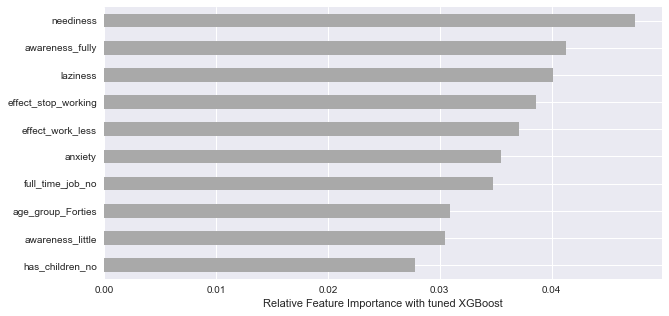

In [142]:
# plot the important features - based on tuned XGBoost
feat_importances = pd.Series(booster_tuned.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with tuned XGBoost');

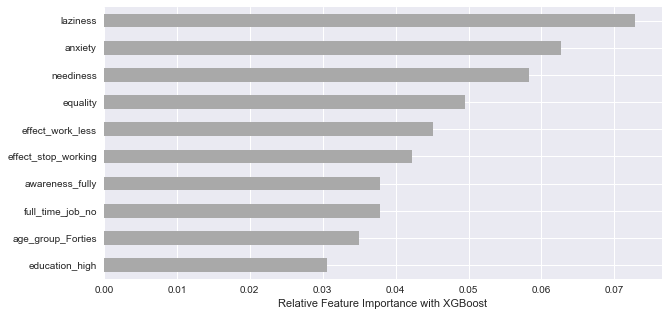

In [139]:
# plot the important features - based on plain XGBoost
feat_importances = pd.Series(booster.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost');

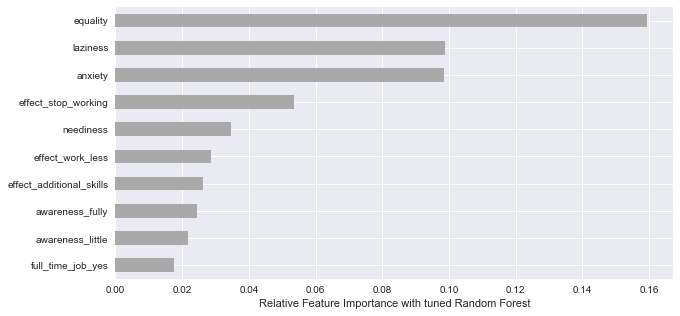

In [144]:
# plot the important features - based on tuned Random Forest
feat_importances = pd.Series(forest_tuned.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with tuned Random Forest');

This last plot, produced by our tuned Random Forest, draws the most distinct picture. We see that the attitude towards the argument *"It creates more equality of opportunity"* is the first and most important feature to split people.

#### 5.3. Recommendation 
<a id='5.3. Recommendation'></a>

Before we give a final recommendation, let's check the full **classification reports** for our 5 best performing models:

In [145]:
print('Classification Report tuned XGBoost: \n', report_booster_tuned)
print('------------------------------------------------------')
print('Classification Report Logistic Regression: \n', report_logreg)
print('------------------------------------------------------')
print('Classification Report SVM: \n', report_svm)
print('------------------------------------------------------')
print('Classification Report plain XGBoost: \n', report_booster)
print('------------------------------------------------------')
print('Classification Report tuned Random Forest: \n', report_forest_tuned)

Classification Report tuned XGBoost: 
               precision    recall  f1-score   support

     against       0.69      0.38      0.49       444
         for       0.80      0.94      0.86      1152

   micro avg       0.78      0.78      0.78      1596
   macro avg       0.75      0.66      0.68      1596
weighted avg       0.77      0.78      0.76      1596

------------------------------------------------------
Classification Report Logistic Regression: 
               precision    recall  f1-score   support

     against       0.67      0.41      0.51       444
         for       0.80      0.92      0.86      1152

   micro avg       0.78      0.78      0.78      1596
   macro avg       0.74      0.67      0.68      1596
weighted avg       0.77      0.78      0.76      1596

------------------------------------------------------
Classification Report SVM: 
               precision    recall  f1-score   support

     against       0.80      0.27      0.40       444
         for  

The F1 score considers both the precision and the recall of the test. It's high when it comes to predict the "for" votes across all models, but substantially lower when it comes to the "against" votes. The highest F1 scores for these very "against" votes are yielded by the **tuned XGBoost** and (interestingly!) by good, old **Logistic Regression**. These two models are the one we'd recommend.

*Back to: <a href='#Table of contents'> Table of contents</a>*